# **Face Mesh**

Face mesh işleminde yüz tespiti ve yüz üzerinde bulunan region of interest denilen bölgelerin tespiti yapılır.

**region of interest**, görüntüde ilgilenilen alanlardır.

Bu bölgeler yüz için;

*    ağız
    
*    sağ kaş
    
*    sol kaş
    
*    sağ göz
    
*    sol göz
    
*    burun
    
*    çenedir.

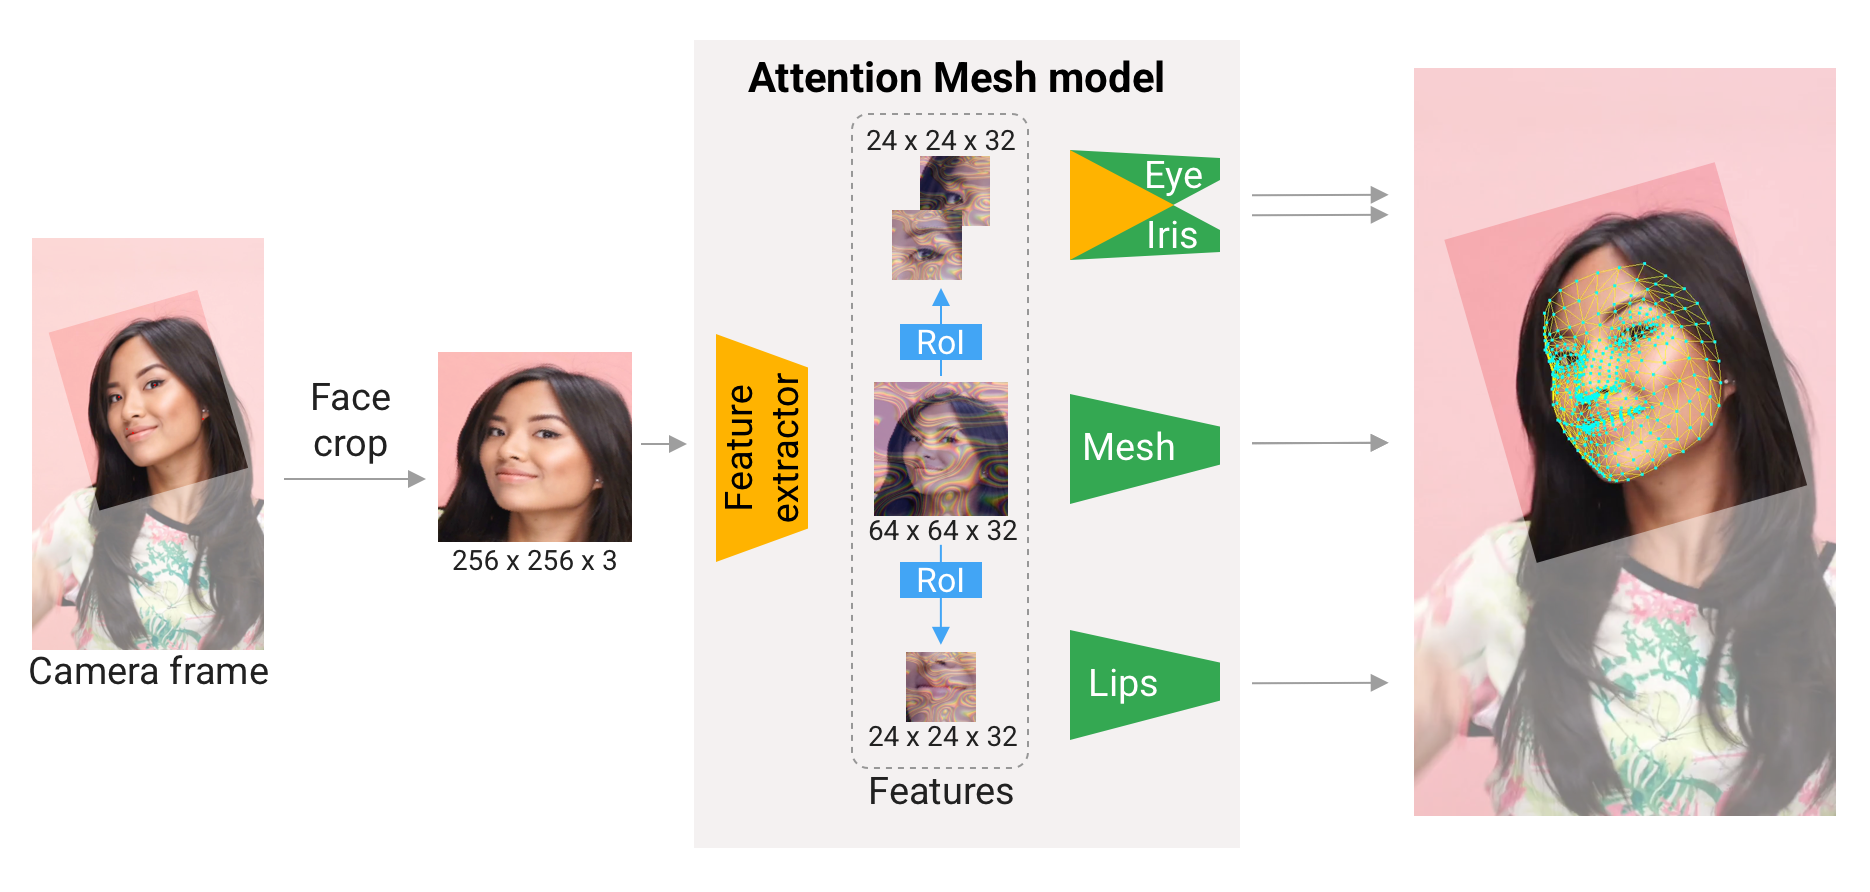

İlk olarak yüz tespit edilip, kırpılır.

Feature extraction kısmında yüzde bulunan region of interestler çıkartılır.

Bu bölgeler göz, kaş, burun gibi bölgelerdir.

Son olarak mesh işlemi region of interestlerin üzerine eklendiğinde yüzde belirlenen bölgelerin tespiti yapılmış olur.

In [ ]:
import cv2
import mediapipe as mp
import time #(fps) -> frame per second

In [ ]:
capture = cv2.VideoCapture(r"C:\Users\ilhan\Desktop\video3.mp4")

VideoCapture classının içerisine 0 yazıldığında kameradan görüntü alınarak mesh işlemi gerçekleştirilir.

In [ ]:
media_pipe_face_mesh = mp.solutions.face_mesh

face_mesh classı çağırılarak media_pipe_face_mesh objesi yaratılmıştır.

In [ ]:
face_mesh = media_pipe_face_mesh.FaceMesh(max_num_faces = 2)

media_pipe_face_mesh objesi kullanılarak FaceMesh methodu çağrılır.

max_num_faces parametresi ile bir sınır belirlenir.

In [ ]:
media_pipe_draw = mp.solutions.drawing_utils

drawing_utils ile classı ile media_pipe_draw objesi yaratılmıştır.

In [ ]:
draw_spec = media_pipe_draw.DrawingSpec(thickness = 1, circle_radius = 1)

Bazı durumlarda, yüz uzakta olduğunda mesh işlemi gerçekleşmeyecektir ya da yüz çok yakında olduğunda çizgilerin kalınlaştırılması gerekmektedir.

Bunun için DrawingSpec methodu çağrılarak thickness (kalınlık) ve circle_radius (iskelet görünümündeki köşe noktalar)  parametreleri belirlenir.

In [ ]:
p_time = 0

In [ ]:
#video read
while True:
    
    ret, frame = capture.read()
    
    if ret == True:
        
        #converting bgr to rgb format
        imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        result = face_mesh.process(imgRGB) #mediapipe'ta görüntü işlenir.
        #print(result.multi_face_landmarks)
        #yüzde bulunan mesh pointlerin koordinatları normalize edilmiş şekilde yazdırılır.
        
        if result.multi_face_landmarks:
            
            for face_landmarks in result.multi_face_landmarks:
                
                media_pipe_draw.draw_landmarks(frame, face_landmarks, media_pipe_face_mesh.FACEMESH_CONTOURS, draw_spec, draw_spec)
                #media_pipe_face_mesh.FACEMESH_CONTOURS ya da FACEMESH_TESSELATION kullanılarak region of interestler belirlenir.
                
                for id, lm in enumerate(face_landmarks.landmark):
                    h, w, color = frame.shape
                    cx, cy = int(lm.x*w), int(lm.y*h)
                    #print([id, cx, cy])
                    #roi noktalarının koordinatları kullanılarak duygu analizi gerçekleştirilebilir.
        
        c_time = time.time()
        fps = 1/(c_time-p_time)
        p_time = c_time
        cv2.putText(frame, "FPS: " + str(int(fps)), (10,65), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,0), 2)
        
        cv2.imshow("Face mesh",frame)
        
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

    else:
        break
        
capture.release()
cv2.destroyAllWindows()